In [30]:
data<-read.csv("europe_population_example.csv")
# Install and load the tidyr package
install.packages("tidyr")
library(dplyr)
library(tidyr)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/t0/f054bgvj7d514yq2qlg1czv80000gp/T//RtmpnCSWYn/downloaded_packages


In [31]:
# (b)

In [32]:
# (c) Solution

# first off the columns and rows and mixed up.
# it is better to habe column country, year and score -> spread

# Assuming your data is stored in a data frame called "data"
# Replace "data" with the name of your actual data frame if different
# Tidy the data and mutate the year column
tidy_data <- gather(data, year, population, -country) %>%
  mutate(year = gsub("year_", "", year))

# Display the first few rows of the updated tidy data
head(tidy_data)


,country,year,population
,<chr>,<chr>,<int>
1,France,1960,82200125
2,Germany,1960,66682867
3,Italy,1960,55079037
4,Poland,1960,36562619
5,Spain,1960,40449976
6,France,1961,87191493


In [33]:
# (d)

# Load necessary libraries
library(dplyr)

# Assuming your data is stored in a data frame called "data"
# Replace "data" with the name of your actual data frame if different

# Arrange data by country and year
arranged_data <- tidy_data %>% arrange(country, year)

# Calculate absolute change
# https://www.youtube.com/watch?v=TGFTUibUquQ
arranged_data <- arranged_data %>%
  group_by(country) %>%
  mutate(
    absolute_change = abs(population - lag(population)),
    # chatgpt was missing absolute
    relative_change = (absolute_change / lag(population)) * 100
  )

# Display the resulting data
head(arranged_data)


country,year,population,absolute_change,relative_change
<chr>,<chr>,<int>,<int>,<dbl>
France,1960,82200125,NA,NA
France,1961,87191493,4991368,6.072215
France,1962,88796277,1604784,1.840528
France,1963,67401385,21394892,24.094357
France,1964,23335235,44066150,65.378701
France,1965,1271836,22063399,94.549718


In [34]:
# (d) Solution
d_data <- arranged_data %>%
  group_by(country) %>% summarize(
    max_absolute_change = max(absolute_change, na.rm = TRUE),
    min_absolute_change = min(absolute_change, na.rm = TRUE),
    max_relative_change = max(relative_change, na.rm = TRUE),
    min_relative_change = min(relative_change, na.rm = TRUE)
  )
d_data

country,max_absolute_change,min_absolute_change,max_relative_change,min_relative_change
<chr>,<int>,<int>,<dbl>,<dbl>
France,77959208,1206562,1268.1890,1.58406599
Germany,95406154,51198,2195.8855,0.05729502
Italy,88409377,334054,4996.0147,0.54109230
Poland,85140503,254228,875.7449,0.45633870
Spain,87355873,2059383,7600.1338,4.01382758


In [35]:
# (e)

german_data <- tidy_data %>%
  filter(country == "Germany")
head(german_data)

,country,year,population
,<chr>,<chr>,<int>
1,Germany,1960,66682867
2,Germany,1961,57755036
3,Germany,1962,57882282
4,Germany,1963,22081788
5,Germany,1964,14315092
6,Germany,1965,36788921


`geom_smooth()` using formula = 'y ~ x'


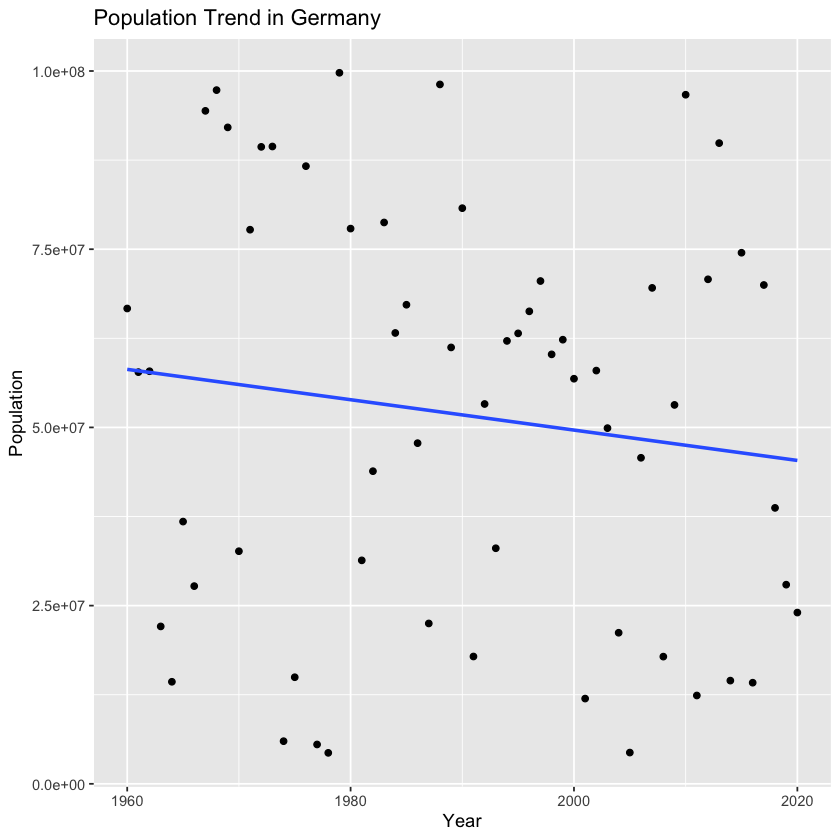

In [36]:
# Load the ggplot2 library
library(ggplot2)

# Assuming your data frame is called 'german_data'

# Convert year to numeric
german_data$year <- as.numeric(german_data$year)

# Create the scatterplot with linear regression line
ggplot(german_data, aes(x = year, y = population)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = FALSE) +  # Add linear regression line
  labs(x = "Year", y = "Population", title = "Population Trend in Germany")


`geom_smooth()` using formula = 'y ~ x'


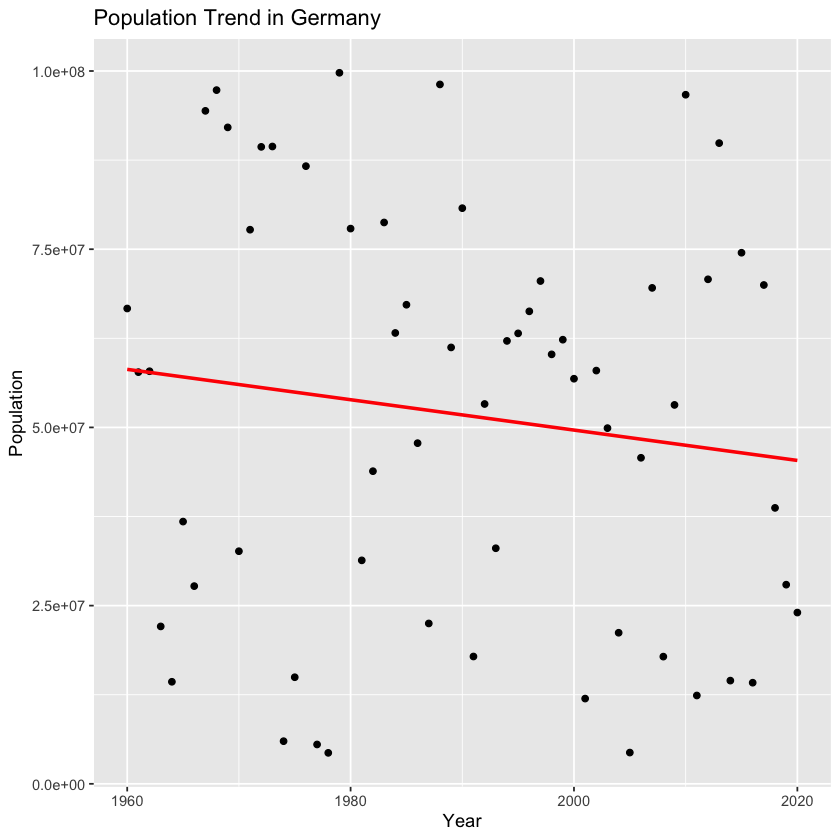

In [37]:
# Load the ggplot2 library
library(ggplot2)

# Assuming your data frame is called 'german_data'

# Convert year to numeric
german_data$year <- as.numeric(german_data$year)

# Create the scatterplot with linear regression line (red color)
ggplot(german_data, aes(x = year, y = population)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = FALSE, color = "red") +  # Add linear regression line (red color)
  labs(x = "Year", y = "Population", title = "Population Trend in Germany")


In [38]:
# ()
# Fit a linear regression model
regression_model <- lm(population ~ year, data = german_data)

# Get the coefficients (intercept and slope)
coefficients <- coefficients(regression_model)

# Display the coefficients
coefficients

# Interpretation:
# steadely declining,


(Intercept)        year 
475549719.8   -212961.6

Interpretation:

The intercept (475,549,719.78477) represents the estimated population in Germany at year 0 (the starting year of the dataset), although this value is not meaningful in this context because the year 0 is arbitrary. It indicates the population value when the year is 0, which doesn't have a real-world interpretation.
The coefficient for the year (-212,961.561396087) represents the estimated change in population for each unit increase in the year. In this case, it suggests that the population in Germany decreases by approximately 212,962 people per year on average over the time period covered by the dataset.

In [39]:
# # not working at all, I can't see the fucking scatter plot...
# german_data <- tidy_data %>% filter(country == "Germany")
# plot(
#   x = german_data$year,
#   y = german_data$population,
#   main = "Deutsche Population 1960-2020",
#   xlab = "Jahre",
#   ylab = "Population"
# )
# modell <- lm(german_data$population ~ german_data$year, data = german_data)
# intercept <- coef(modell)[1]
# slope <- coef(modell)[2]
# 
# # Plot the scatterplot
# plot(x, y)
# abline(modell, col = 'red', lwd = 2)
# #modell

Warning message in abline(modell, col = "red", lwd = 2):
"nutze nur die ersten beiden von 61 Regressionskoeffizienten"


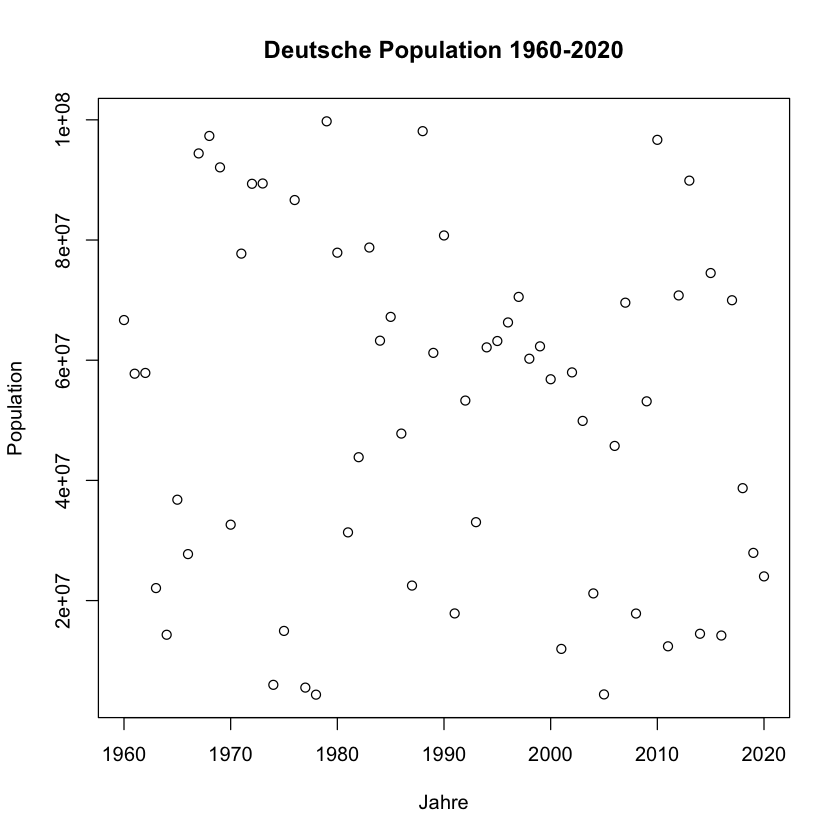

In [40]:
library(dplyr)

# Filter the data for Germany
german_data <- tidy_data %>% 
  filter(country == "Germany")

# Plot the scatterplot
plot(
  x = german_data$year,
  y = german_data$population,
  main = "Deutsche Population 1960-2020",
  xlab = "Jahre",
  ylab = "Population"
)

# Fit a linear regression model
modell <- lm(population ~ year, data = german_data)

# Extract coefficients
intercept <- coef(modell)[1] # a
slope <- coef(modell)[2] # b

# Add the regression line
abline(modell, col = 'red', lwd = 2)


In [41]:
# Fit a linear regression model
regression_model <- lm(population ~ year, data = german_data)

# Get the summary of the regression model
summary_model <- summary(regression_model)
summary_model
# Extract the coefficient of determination (R-squared) from the summary
r_squared <- summary_model$r.squared

# Display the coefficient of determination
r_squared



Call:
lm(formula = population ~ year, data = german_data)

Residuals:
ALL 61 residuals are 0: no residual degrees of freedom!

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  66682867        NaN     NaN      NaN
year1961     -8927831        NaN     NaN      NaN
year1962     -8800585        NaN     NaN      NaN
year1963    -44601079        NaN     NaN      NaN
year1964    -52367775        NaN     NaN      NaN
year1965    -29893946        NaN     NaN      NaN
year1966    -38947037        NaN     NaN      NaN
year1967     27727895        NaN     NaN      NaN
year1968     30636708        NaN     NaN      NaN
year1969     25407425        NaN     NaN      NaN
year1970    -34050384        NaN     NaN      NaN
year1971     11054516        NaN     NaN      NaN
year1972     22675684        NaN     NaN      NaN
year1973     22726882        NaN     NaN      NaN
year1974    -60701362        NaN     NaN      NaN
year1975    -51729500        NaN     NaN      NaN
year1976

[1] 1

A coefficient of determination (
𝑅^2
 ) value of 0.0172537396458376 indicates that approximately 1.73% of the variance in the population of Germany can be explained by the year variable in the linear regression model. In other words:

The linear regression model, which uses the year variable to predict the population of Germany, explains only a small proportion (about 1.73%) of the variability observed in the population data.
The remaining variance in the population data is not explained by the linear relationship between the year and population variables captured by the regression model.
Therefore, based on this 
𝑅
2
R 
2
  value:

The linear regression model has limited explanatory power in predicting the population of Germany based solely on the year variable.
Other factors or variables not included in the model may contribute significantly to the variation in the population data.

In [42]:
# Fit a linear regression model
regression_model <- lm(population ~ year, data = german_data)

# Make a prediction for the year 2023
predicted_population_2023 <- predict(regression_model, newdata = data.frame(year = 2023))

# Display the predicted population for 2023
predicted_population_2023

Warning message in model.frame.default(Terms, newdata, na.action = na.action, xlev = object$xlevels):
"Variable 'year' is kein Faktor"


ERROR: Error: Variable 'year' wurde mit Typ "character" gefitted, angegeben wurde aber Typ "numeric"


In [43]:
daten <- df %>% filter(country == "Germany")
plot(
  german_data$year,
  german_data$population,
  main = "Deutsche Population 1960-2020",
  xlab = "Jahre",
  ylab = "Population"
)
head(daten)

modell <- lm(german_data$population ~ german_data$year, data = german_data)
abline(modell, col = "red", lwd = 2)
modell
# f)
a <- modell$coefficients[1]
b <- modell$coefficients[2]
a # intercept 475549720 Y-Achsenabschnitt
b # daten$years -212961.6 Steigung

# g)
summary(modell)$r.squared # # R² des Modells
# 0.01725374 says nothing

# h)
year = 2023
y = a + b * year
y

ERROR: Error in UseMethod("filter"): nicht anwendbare Methode f"ur 'filter' auf Objekt der Klasse "function" angewendet
